In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import keras_tuner as kt

In [2]:
# Download crypto data
cryptos = ['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD']
data = yf.download(cryptos, start='2020-10-01', end='2024-09-30')
price_df = data['Adj Close']
price_df

[*********************100%***********************]  6 of 6 completed


Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,,,
2020-10-01 00:00:00+00:00,0.097865,27.431973,10619.452148,353.205902,2.861028,0.238249
2020-10-02 00:00:00+00:00,0.092921,27.285681,10575.974609,346.238922,2.626083,0.234117
2020-10-03 00:00:00+00:00,0.093413,28.202311,10549.329102,346.522095,2.547303,0.232938
2020-10-04 00:00:00+00:00,0.096348,28.943853,10669.583008,352.579010,2.515995,0.247685
2020-10-05 00:00:00+00:00,0.097544,28.659103,10793.339844,353.956787,2.657644,0.250816
...,...,...,...,...,...,...
2024-09-25 00:00:00+00:00,0.381083,587.352539,63143.144531,2579.388672,148.023422,0.583541
2024-09-26 00:00:00+00:00,0.401882,596.776917,65181.019531,2632.199951,155.576096,0.590421
2024-09-27 00:00:00+00:00,0.402328,607.867004,65790.664062,2695.900635,157.749939,0.588927


Trial 3 Complete [00h 00m 09s]
val_loss: 0.002170149702578783

Best val_loss So Far: 0.001791776972822845
Total elapsed time: 00h 00m 41s


/Users/yb/anaconda3/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         2,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,654 (447.87 KB)

 Trainable params: 114,654 (447.87 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━

/Users/yb/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/yb/anaconda3/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,870 (202.62 KB)

 Trainable params: 51,870 (202.62 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/Users/yb/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/yb/anaconda3/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         2,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,654 (447.87 KB)

 Trainable params: 114,654 (447.87 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━

/Users/yb/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/yb/anaconda3/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,014 (789.12 KB)

 Trainable params: 202,014 (789.12 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━

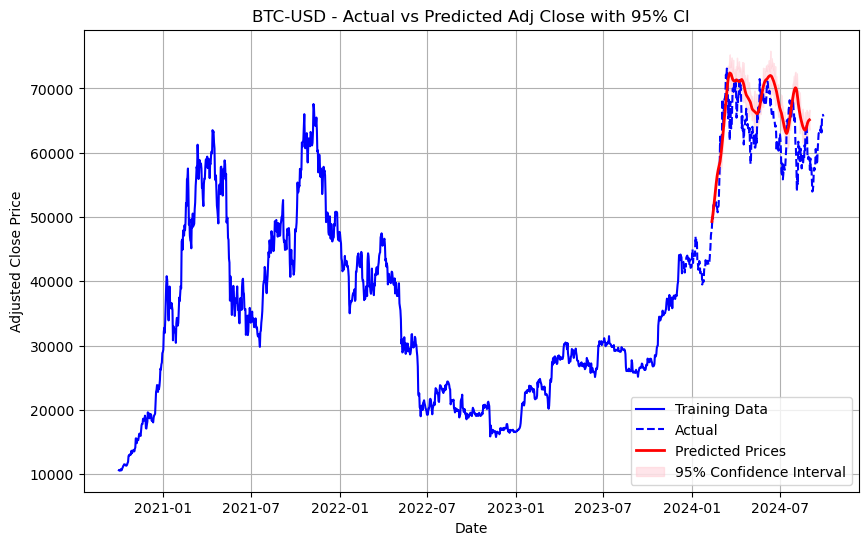

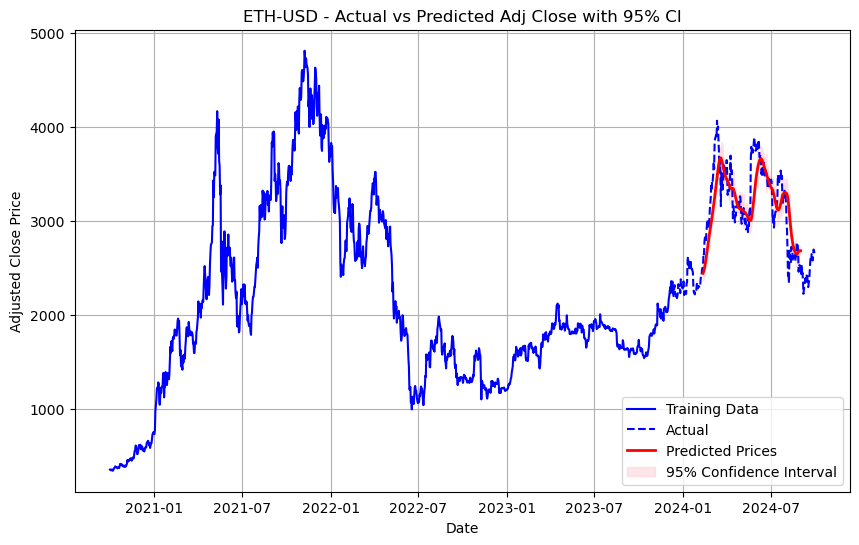

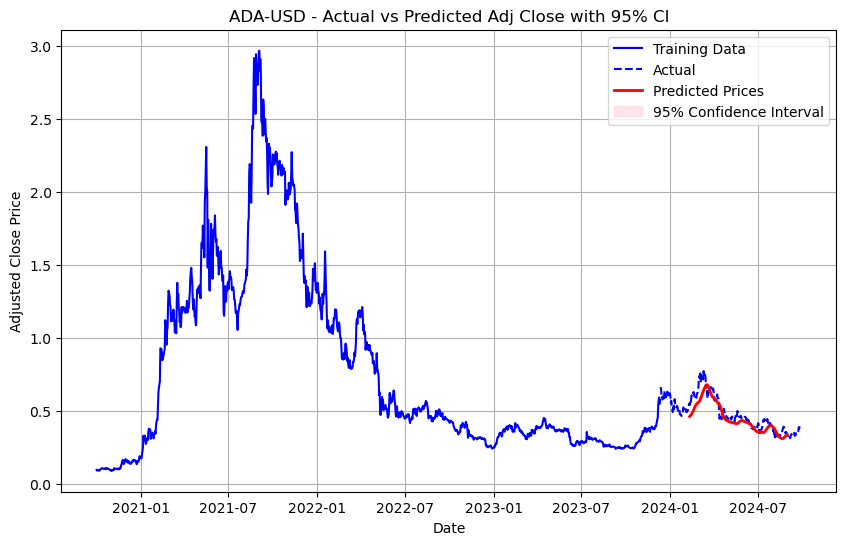

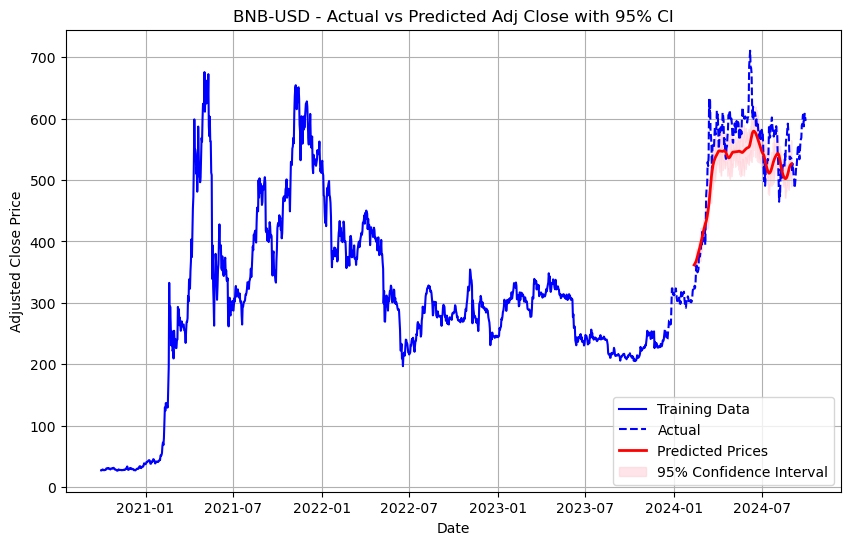

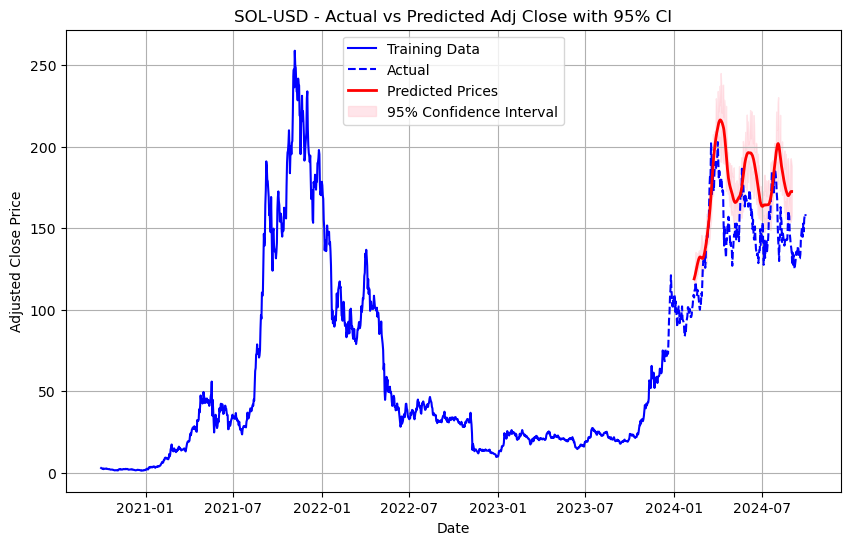

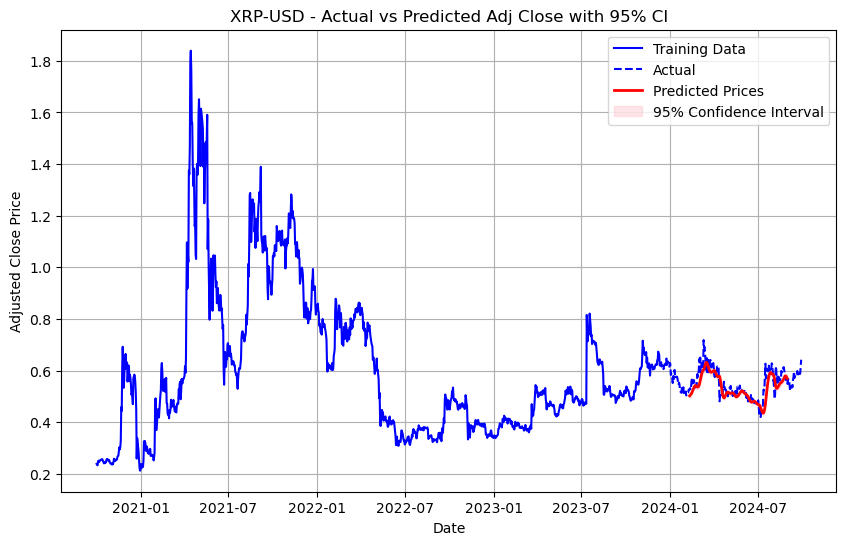

    Ticker           MSE
0  BTC-USD  3.757972e+09
1  ETH-USD  9.854711e+06
2  ADA-USD  1.612828e+00
3  BNB-USD  2.424009e+05
4  SOL-USD  2.240376e+04
5  XRP-USD  1.314948e+00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import keras_tuner as kt

# Adjusted sequence creation function
def create_sequences(data, n_steps, n_outputs):
    X, y = [], []
    for i in range(len(data) - n_steps - n_outputs + 1):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps:i + n_steps + n_outputs])
    return np.array(X), np.array(y)

# LSTM model building function with hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   input_shape=(n_steps, 1), return_sequences=True))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(Dense(30))  # Predict 30 days ahead
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Store results to plot later
all_actuals = {}
all_predictions = {}
mse_results = {}

# Loop over each crypto ticker
for ticker in cryptos:
    print(f"Processing {ticker}...")

    # 1. Log Transformation
    log_transformed = np.log(price_df[ticker].dropna())

    # 2. Train-Test Split (80-20)
    train_size = int(len(log_transformed) * 0.8)
    train_data, test_data = log_transformed[:train_size], log_transformed[train_size:]

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

    # Create sequences for LSTM
    n_steps = 60  # Use a 60-day window
    X_train, y_train = create_sequences(train_scaled, n_steps, 30)  # Predict 30 steps
    X_test, y_test = create_sequences(test_scaled, n_steps, 30)

    # 3. Hyperparameter Tuning with Keras Tuner
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=3,
        executions_per_trial=1,
        directory='/tmp/' + ticker + 'multi_step',
        project_name='crypto_lstm'
    )

    tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    best_model = tuner.get_best_models(num_models=1)[0]
    best_model.summary()

    # 4. Monte Carlo sampling for CI
    n_simulations = 100  # Number of simulations to estimate CI
    predictions = np.array([best_model.predict(X_test) for _ in range(n_simulations)])
    mean_prediction = predictions.mean(axis=0)

    # Calculate the 95% CI (using 1.96*std for normal distribution)
    lower_bound = mean_prediction - 1.96 * predictions.std(axis=0)*10000
    upper_bound = mean_prediction + 1.96* predictions.std(axis=0) *10000

    # Reshape predictions and test data to match MinMaxScaler expectations
    y_test_reshaped = y_test.reshape(-1, 1)
    y_test_rescaled = scaler.inverse_transform(y_test_reshaped).reshape(y_test.shape)

    # Inverse transform mean prediction and CI bounds
    mean_pred_rescaled = np.exp(scaler.inverse_transform(mean_prediction.reshape(-1, 1)).reshape(mean_prediction.shape))
    lower_bound_rescaled = np.exp(scaler.inverse_transform(lower_bound.reshape(-1, 1)).reshape(lower_bound.shape))
    upper_bound_rescaled = np.exp(scaler.inverse_transform(upper_bound.reshape(-1, 1)).reshape(upper_bound.shape))

    # Store predictions and CI bounds for later plotting
    all_actuals[ticker] = np.exp(log_transformed)
    all_predictions[ticker] = (train_size + n_steps, mean_pred_rescaled, lower_bound_rescaled, upper_bound_rescaled)

    # Compute MSE for this ticker (flatten arrays)
    y_test_flat = y_test_rescaled.reshape(-1)
    mean_pred_flat = mean_pred_rescaled.reshape(-1)
    mse = mean_squared_error(y_test_flat, mean_pred_flat)
    mse_results[ticker] = mse

    # Print out predictions and CI values for verification
    print(f"\nConfidence Interval and Predictions for {ticker}:")
    print("Mean Prediction (First 10):", mean_pred_flat[:10])
    print("Lower CI (First 10):", lower_bound_rescaled[:, 0][:10])
    print("Upper CI (First 10):", upper_bound_rescaled[:, 0][:10])

# 5. After gathering all data, plot the results for each ticker
for ticker in cryptos:
    actual = all_actuals[ticker]
    start_idx, mean_pred, lower_ci, upper_ci = all_predictions[ticker]

    # Flatten predictions for plotting (only the first prediction of each sequence for simplicity)
    mean_pred_flat = mean_pred[:, 0]
    lower_ci_flat = lower_ci[:, 0]
    upper_ci_flat = upper_ci[:, 0]

    # Create a DataFrame for plotting the predictions and CIs (align dates properly)
    forecast_test = pd.DataFrame(
        {'ds': actual.index[start_idx:start_idx + len(mean_pred_flat)],
         'y': mean_pred_flat,
         'lower_ci': lower_ci_flat,
         'upper_ci': upper_ci_flat}
    )

    plt.figure(figsize=(10, 6))

    # Plot actual training data (blue line)
    plt.plot(actual.index[:train_size], actual[:train_size], label='Training Data', color='blue')

    # Plot actual test data (blue dashed line)
    plt.plot(actual.index[train_size:], actual[train_size:], label='Actual', color='blue', linestyle='--')

    # Plot predicted prices with CI (red line and shaded area)
    plt.plot(forecast_test['ds'], forecast_test['y'], label='Predicted Prices', color='red', linewidth=2)
    plt.fill_between(forecast_test['ds'], forecast_test['lower_ci'], forecast_test['upper_ci'],
                     color='pink', alpha=0.4, label='95% Confidence Interval')


    # Add plot details
    plt.title(f'{ticker} - Actual vs Predicted Adj Close with 95% CI')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# 6. Create and display the MSE results table
mse_df = pd.DataFrame(list(mse_results.items()), columns=['Ticker', 'MSE'])
print(mse_df)


In [4]:
mse_df['rmse'] = np.sqrt(mse_df['MSE'])
print(mse_df)

    Ticker           MSE          rmse
0  BTC-USD  3.757972e+09  61302.299042
1  ETH-USD  9.854711e+06   3139.221457
2  ADA-USD  1.612828e+00      1.269972
3  BNB-USD  2.424009e+05    492.342249
4  SOL-USD  2.240376e+04    149.678859
5  XRP-USD  1.314948e+00      1.146712
